# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [36]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [37]:
# run this cell to upload file using GUI if you are using google colab

#from google.colab import files
#files.upload()

In [38]:
# run this cell to to mount the google drive if you are using google colab

#from google.colab import drive
#drive.mount('/content/drive/My Drive/')

In [39]:
# Importing necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [40]:
# Importing the dataset 
df = pd.read_csv('prices.csv')

In [41]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop null
- Drop null values if any

In [42]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [43]:
#There are no null values in this dataset as nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [44]:
# Creating a copy before deleting the columns

df_copy = df.copy()

In [45]:
df.drop(columns = ['date','volume','symbol'], axis=1, inplace=True )

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    851264 non-null  float64
 1   close   851264 non-null  float64
 2   low     851264 non-null  float64
 3   high    851264 non-null  float64
dtypes: float64(4)
memory usage: 26.0 MB


## Question 3

### Print the dataframe
- print the modified dataframe

In [47]:
df

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002
...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000
851260,43.070000,43.040001,42.689999,43.310001
851261,53.639999,53.529999,53.270000,53.740002
851262,44.730000,45.450001,44.410000,45.590000


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [48]:
# X are features and y are labels
X = df.drop('close', axis=1)
y = df['close']

In [49]:
print(X.head())
y.head()

         open         low        high
0  123.430000  122.309998  126.250000
1  125.239998  119.940002  125.540001
2  116.379997  114.930000  119.739998
3  115.480003  113.500000  117.440002
4  117.010002  114.089996  117.330002


0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [50]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=100)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X) 

In [52]:
print(test_X)

[[-0.18083958 -0.18336376 -0.18579603]
 [-0.59051571 -0.59102358 -0.59231908]
 [-0.31256824 -0.30828594 -0.31133643]
 ...
 [-0.63698001 -0.6350426  -0.6370532 ]
 [-0.37424123 -0.37757963 -0.37742906]
 [-0.59650337 -0.59598176 -0.59754002]]


## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [53]:
import numpy as np

print(type(train_X))
print(type(train_y))
print(type(test_X))
print(type(test_y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [54]:
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

In [55]:
print(type(train_X))
print(type(train_y))
print(type(test_X))
print(type(test_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [56]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Input data
#model.add(tf.keras.Input(shape = (3,)))

#Flatten data
model.add(tf.keras.layers.Flatten())

#Add a dense layer
model.add(tf.keras.layers.Dense(1, activation='linear'))

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [57]:
# Compiling model
model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics=["accuracy"])

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [58]:
# Fitting model
model.fit(x=train_X, y=train_y, batch_size=128, epochs=50, validation_data=(test_X, test_y))

Epoch 1/50
4656/4656 [==============================] - 5s 1ms/step - loss: 41.3348 - accuracy: 3.3564e-06 - val_loss: 0.9535 - val_accuracy: 3.9157e-06
Epoch 2/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9683 - accuracy: 3.3564e-06 - val_loss: 0.9629 - val_accuracy: 3.9157e-06
Epoch 3/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9618 - accuracy: 3.3564e-06 - val_loss: 0.9401 - val_accuracy: 3.9157e-06
Epoch 4/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9546 - accuracy: 3.3564e-06 - val_loss: 0.9334 - val_accuracy: 3.9157e-06
Epoch 5/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9488 - accuracy: 3.3564e-06 - val_loss: 0.9290 - val_accuracy: 3.9157e-06
Epoch 6/50
4656/4656 [==============================] - 5s 1ms/step - loss: 0.9404 - accuracy: 3.3564e-06 - val_loss: 0.9222 - val_accuracy: 3.9157e-06
Epoch 7/50
4656/4656 [==============================] - 6s 1ms/step - loss: 0.9342 - ac

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [59]:
model.evaluate(test_X,test_y)

7981/7981 [==============================] - 8s 971us/step - loss: 0.7164 - accuracy: 3.9157e-06


[0.7163580656051636, 3.9157334867923055e-06]

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [60]:
input_data = np.expand_dims([123.430000, 122.30999, 116.250000], axis=0)
prediction = model.predict(scaler.transform(input_data))
prediction

array([[119.72916]], dtype=float32)

For the scope of this assignment, we have considered a very elemental form of a neural network where we have taken a single neuron with a single layer and a linear activation function. Hence, the accuracy isn't very high. Higher accuracy can be achieved as hyper parameters are tuned and more nuerons and layers added. With a single layer and a neuron, it could only learn so much in a regression setting. 

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [61]:
(trainX,trainY),(testX,testY) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [62]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [63]:
# Unique classes in our dataset
set(trainY)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

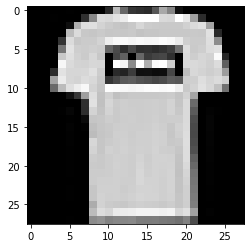

In [64]:
#sample image
plt.imshow(trainX[1],cmap='gray')
plt.show() 

### Change train and test labels into one-hot vectors

In [65]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [66]:
print(testY.shape)
trainY.shape

(10000, 10)


(60000, 10)

### Build the Graph

### Initialize model, reshape & normalize data

In [67]:
# reshape the data
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1) 
# Normalizing the Data
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255
testX /= 255 

In [68]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [69]:
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

from tensorflow.keras.layers import Dropout
model.add(Dropout(0.25)) 

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [70]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))
# Compiling model
model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"], 
              optimizer="adam")

In [71]:
# Fitting model
model.fit(x=trainX, y=trainY, batch_size=20, epochs=60, validation_data=(testX, testY))

Epoch 1/60
3000/3000 [==============================] - 7s 2ms/step - loss: 0.5443 - accuracy: 0.8105 - val_loss: 0.4603 - val_accuracy: 0.8407
Epoch 2/60
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4234 - accuracy: 0.8484 - val_loss: 0.4145 - val_accuracy: 0.8486
Epoch 3/60
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3774 - accuracy: 0.8641 - val_loss: 0.3579 - val_accuracy: 0.8716
Epoch 4/60
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3511 - accuracy: 0.8740 - val_loss: 0.3848 - val_accuracy: 0.8641
Epoch 5/60
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3323 - accuracy: 0.8799 - val_loss: 0.3723 - val_accuracy: 0.8667
Epoch 6/60
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3168 - accuracy: 0.8852 - val_loss: 0.3414 - val_accuracy: 0.8781
Epoch 7/60
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3069 - accuracy: 0.8886 - val_loss: 0.3623 - val_accuracy:

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,510
Trainable params: 178,310
Non-trainable params: 200
________________________________________________

We get a decent validation accuracy of 89%. Hyper parameters could be further tuned to get better results. 